In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
from utils import proj

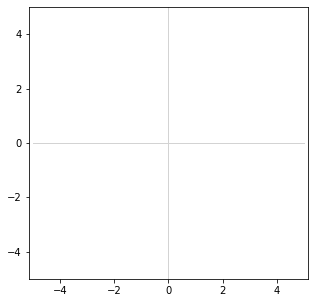

In [3]:
# Set up the figure, axis, and the static plot element
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
# 'lightsalmon'

xaxis = ax.plot([0, 0], [-5, 5], c='lightgray', lw=1)
xaxis = ax.plot([-5, 5], [0, 0], c='lightgray', lw=1)
line, = ax.plot([], [], '--', lw=2, c='mistyrose')
project, = ax.plot([], [],lw=2, c='salmon')
dis, = ax.plot([], [],'o--', c='tomato', lw=2)
angle_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
proj_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

In [4]:
frame = 180

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    project.set_data([], [])
    dis.set_data([], [])
    angle_text.set_text('')
    proj_text.set_text('')
    return line, 

# animation function, which is called sequentially and generate frames
def animate(i):
    a = i/frame * 2 * np.pi
    x = np.linspace(-5, 5, 1000)
    y = np.tan(a) * x 
    px, py = proj(2, 3, np.cos(a), np.sin(a))
    line.set_data(x, y)
    project.set_data([0, px], [0, py])
    dis.set_data([px, 2], [py, 3])
    angle_text.set_text('$w$ angle = %.1f$^o$' % (i*3.6))
    proj_text.set_text('$proj_{w}x$ = %.2f' % np.sqrt(px*px + py*py))
    return line, 

In [5]:
# create an animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame, interval=200, blit=True)
html = anim.to_jshtml()

with open('projection.html','w') as f:
    f.write(html)
    
HTML(html)

## center of cluster and projection

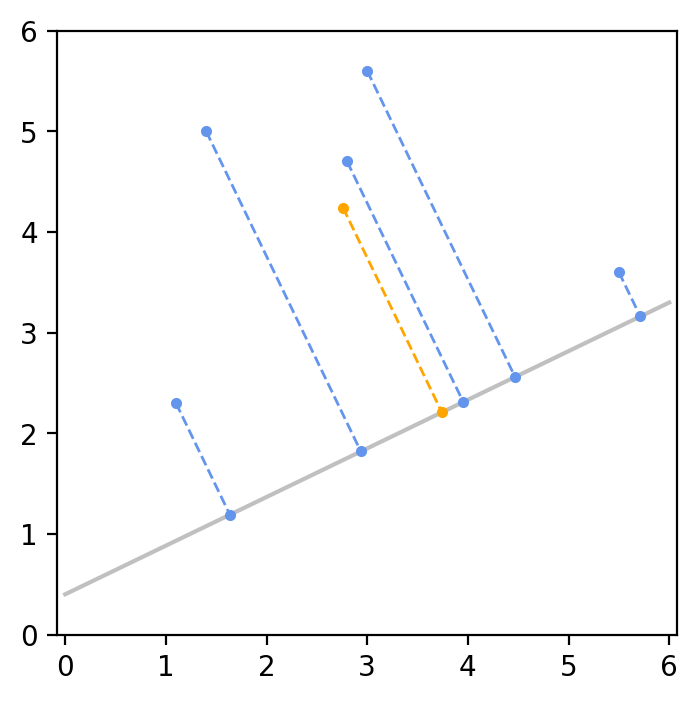

In [92]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
ax.axis('equal')
ax.set_xlim((0, 6))
ax.set_ylim((0, 6))

a = 0.45
d1 = np.array([[1.1, 2.3], [5.5, 3.6], [1.4, 5], [3, 5.6], [2.8, 4.7]])
x = np.linspace(0, 6, 100)
y = np.tan(a) * x + 0.4
ax.plot(x, y, c='silver')
cx = np.average(d1[:, 0])
cy = np.average(d1[:, 1])
pcx, pcy = proj(cx, cy, np.cos(a), np.sin(a), 0, 0.4)
ax.plot([cx, pcx], [cy, pcy], 'o--', c='orange', ms=3, lw=1)
for xi, yi in d1:
    pxi, pyi = proj(xi, yi, np.cos(a), np.sin(a), 0, 0.4)
    ax.plot([xi, pxi], [yi, pyi], 'o--', c='cornflowerblue', ms=3, lw=1)
    
plt.savefig('mean.svg')

/Users/kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  
/Users/kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


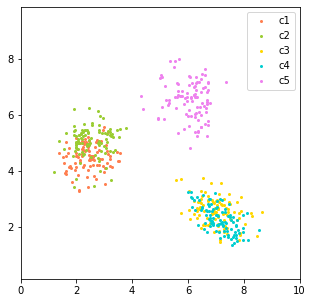